In [2]:
# carregando base de dados https://www.openml.org/d/223
from sklearn.datasets import fetch_openml
stock = fetch_openml(name='stock')
X, y = stock.data, stock.target

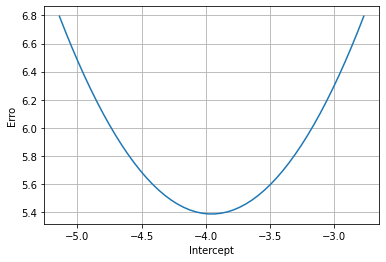

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# delta em porcentagem
delta_percent = 0.3

# treina o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# eixo x
intercept_min = model.intercept_* (1 - delta_percent)
intercept_max = model.intercept_* (1 + delta_percent)
intercept = np.linspace(intercept_min, intercept_max, 50)

# calcula os erros para cada intercept
errors = []
for i in range(len(intercept)): 
    model.intercept_ = intercept[i] # atualiza com o valor do intercept  
    y_pred = model.predict(X)  # calcula a predição  
    mse = mean_squared_error(y, y_pred) # erro medio quadratico
    errors.append(mse) # salva o erro daquele intercept

# plota o gráfico do intercept x errors
plt.ylabel("Erro")
plt.xlabel("Intercept")
plt.grid()
plt.plot(intercept, errors)
plt.show()
